#Paquetes necesarios

Podremos hacer uso del mismo *environment* de la primera práctica, aunque en ocasiones pedirá instalar Pillow

In [13]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

Max of white pixels = 56100
Position of max white pixels = [12]
Number of rows with a 90 % max_row of the white pixels =  6
Dictionary that represents the position and value of the rows with a 90 % max_row of the white pixels =
 {6: 51765, 15: 52020, 20: 51000, 21: 51255, 88: 50745, 100: 54060}


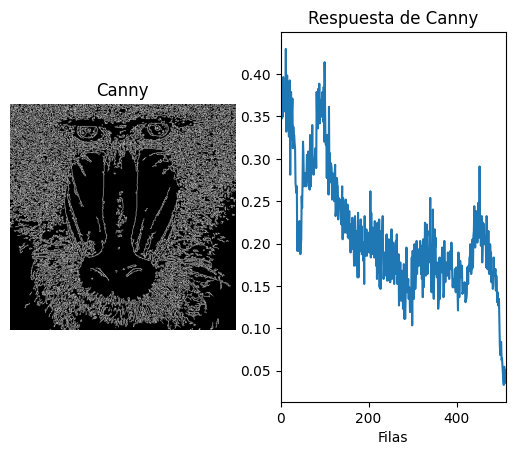

In [14]:
img = cv2.imread('mandril.jpg') 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

rows = row_counts[:,0] / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las filas
plt.xlim([0, canny.shape[0]])

max_row = np.max(row_counts)
pos_max_row = np.where(row_counts == max_row)[0]
print("Max of white pixels =", max_row)
print("Position of max white pixels =", pos_max_row)

mask = (0.9*max_row <= row_counts) & (row_counts < max_row)
pos_90_max = np.where(mask)[0]
print("Number of rows with a 90 % max_row of the white pixels = ", pos_90_max.size)

max_90 = {int(i) : row_counts[i].item() for i in pos_90_max}
print("Dictionary that represents the position and value of the rows with a 90 % max_row of the white pixels =\n", max_90)

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

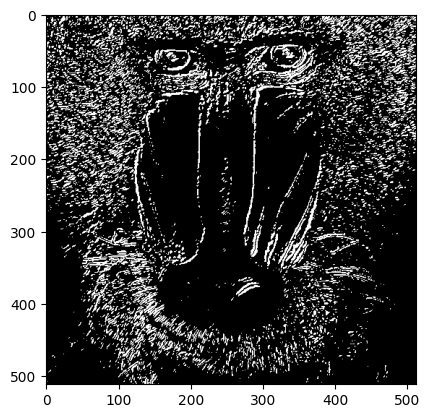

Max of white pixels by rows = 52020
Position of max white pixels by rows = [83]
Number of rows with a 90 % max_row of the white pixels = 4
Dictionary that represents the position and value of the rows with a 90 % max_row of the white pixels =
 {3: 47430, 8: 46920, 82: 46920, 83: 52020}

Max of white pixels by columns = 51000
Position of max white pixels by columns = [288]
Number of columns with a 90% max_col of the white pixels = 5
[104 105 127 287 288]
Dictionary that represents the position and value of the columns with a 90% max_col of the white pixels =
 {104: 48960, 105: 47430, 127: 50745, 287: 45900, 288: 51000}


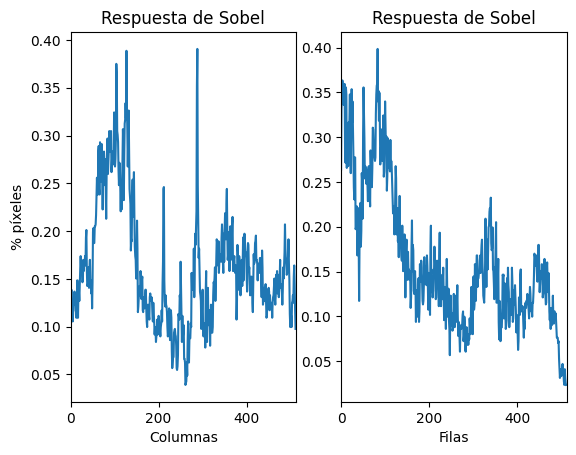

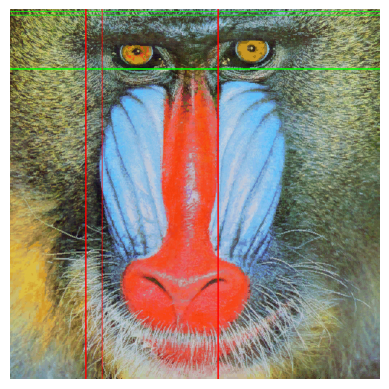

In [15]:
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
sobel = cv2.add(sobelx, sobely)
sobel8 = cv2.convertScaleAbs(sobel)


valueThreshold = 110
_, sobel_Umbralized = cv2.threshold(sobel8, valueThreshold, 255, cv2.THRESH_BINARY)

plt.imshow(sobel_Umbralized, cmap = 'gray')
plt.show()

row_counts = cv2.reduce(sobel_Umbralized, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts = cv2.reduce(sobel_Umbralized, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

cols = col_counts[0] / (255 * sobel_Umbralized.shape[0])

#Muestra dicha cuenta gráficamente

plt.subplot(1, 2, 1)
plt.title("Respuesta de Sobel")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

rows = row_counts[:,0] / (255 * sobel_Umbralized.shape[1])

plt.subplot(1, 2, 2)
plt.title("Respuesta de Sobel")
plt.xlabel("Filas")
plt.plot(rows)
#Rango en x definido por las filas
plt.xlim([0, sobel_Umbralized.shape[0]])


max_row = np.max(row_counts)
pos_max_row = np.where(row_counts == max_row)[0]
print("Max of white pixels by rows =", max_row)
print("Position of max white pixels by rows =", pos_max_row)

mask_row = (0.9*max_row <= row_counts) 
pos_90_max_row = np.where(mask_row)[0]
print("Number of rows with a 90 % max_row of the white pixels =", pos_90_max_row.size)

max_90_row = {int(i) : row_counts[i].item() for i in pos_90_max_row}
print("Dictionary that represents the position and value of the rows with a 90 % max_row of the white pixels =\n", max_90_row)

col_counts = col_counts.ravel()
max_col = np.max(col_counts)
pos_max_col = np.where(col_counts == max_col)[0]
print("\nMax of white pixels by columns =", max_col)
print("Position of max white pixels by columns =", pos_max_col)

mask_col = (0.9*max_col <= col_counts)
pos_90_max_col = np.where(mask_col)[0]
print("Number of columns with a 90% max_col of the white pixels =", pos_90_max_col.size)
print(pos_90_max_col)


max_90_col = {int(i) : int(col_counts[i]) for i in pos_90_max_col}
print("Dictionary that represents the position and value of the columns with a 90% max_col of the white pixels =\n", max_90_col)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for row in pos_90_max_row:
    cv2.line(img_rgb, (0, row), (img_rgb.shape[1]-1, row), color=(0,255,0), thickness=1)

for col in pos_90_max_col:
    cv2.line(img_rgb, (col, 0), (col, img_rgb.shape[1]-1), color=(255,0,0), thickness=1)

plt.figure()
plt.axis("off")
plt.imshow(img_rgb) 
plt.show()





TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [16]:
def colorFilter(frame, hsv, color="green"):
    if color == "green":
        mask = cv2.inRange(hsv, (35, 40, 40), (85, 255, 255))  

    elif color == "red":
        mask1 = cv2.inRange(hsv, (0, 100, 100), (10, 255, 255))
        mask2 = cv2.inRange(hsv, (170, 100, 100), (180, 255, 255))
        mask = mask1 | mask2

    elif color == "blue":
        mask = cv2.inRange(hsv, (90, 50, 50), (130, 255, 255))

    else:
        return frame  

    return cv2.bitwise_and(frame, frame, mask=mask)


vid = cv2.VideoCapture(0)
mode = "none"

while True:
    ret, frame = vid.read()
    if ret:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        if mode == "none":
            salida = frame
        else:
            salida = colorFilter(frame, hsv, mode)

        cv2.imshow("Original", frame)
        cv2.imshow("Filtered", salida)

        key = cv2.waitKey(20) & 0xFF
        match key:
            case 27:  # ESC
                break
            case 49:  # tecla '1'
                mode = "green"
                print("Mode: green\n")
            case 50:  # tecla '2'
                mode = 'red'
                print("Mode: red\n")
            case 51:  # tecla '3'
                mode = 'blue'
                print("Mode: blue\n")

vid.release()
cv2.destroyAllWindows()


Mode: red

Mode: blue

Mode: green

Mode: red

Mode: blue



TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [17]:
vid = cv2.VideoCapture(0)

ret, prev_frame = vid.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

while True:
    ret, frame = vid.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    diff = cv2.absdiff(gray, prev_gray)

    _, mask = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    motion_map = np.zeros_like(frame)

    motion_map[mask > 0] = (0, 255, 0)

    column_sum = np.sum(mask, axis=0)  
    column_sum = column_sum / column_sum.max() * frame.shape[0] if column_sum.max() > 0 else column_sum

    for x, h in enumerate(column_sum.astype(int)):
        cv2.line(motion_map, (x, frame.shape[0]), (x, frame.shape[0] - h), (0, 0, 255), 1)

    combined = np.hstack((frame, motion_map))
    cv2.imshow("Movimiento", combined)

    prev_gray = gray.copy()

    if cv2.waitKey(1) & 0xFF == 27:
        break

vid.release()
cv2.destroyAllWindows()
